In [73]:
# Source : O reilly " Introduction to machine learning"
# On charge notre dataset à partir du serveur internet de la lib sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [74]:
# On regarde les clefs de notre dataset 
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [75]:
# On regarde les caractéristiques de notre dataset 
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [76]:
# On regarde les types de fleurs 
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


In [77]:
# On regarde les caractéristique de chaque type de fleur (features), c'est une liste en python
print("Feature names: \n{}".format(iris_dataset['feature_names']))
print("Type of data: {}".format(type(iris_dataset['data'])))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Type of data: <class 'numpy.ndarray'>


In [78]:
# On regarde les 5 premieres lignes de notre dataset 

print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))


First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [79]:
# On regarde comment est indiqué l'espèce de fleur dans le dataset, ce sont des entiers de 0 à 2
print("Type of target: {}".format(type(iris_dataset['target'])))
print("Shape of target: {}".format(iris_dataset['target'].shape))
print("Target:\n{}".format(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>
Shape of target: (150,)
Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [80]:
# On veut créer un modèle qui nous permette de prédire de quelle espèce est une fleur, 
# en lui donnant les caractéristiques 

# On entraine notre ordinateur à connaitre le modele avec ce code :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)

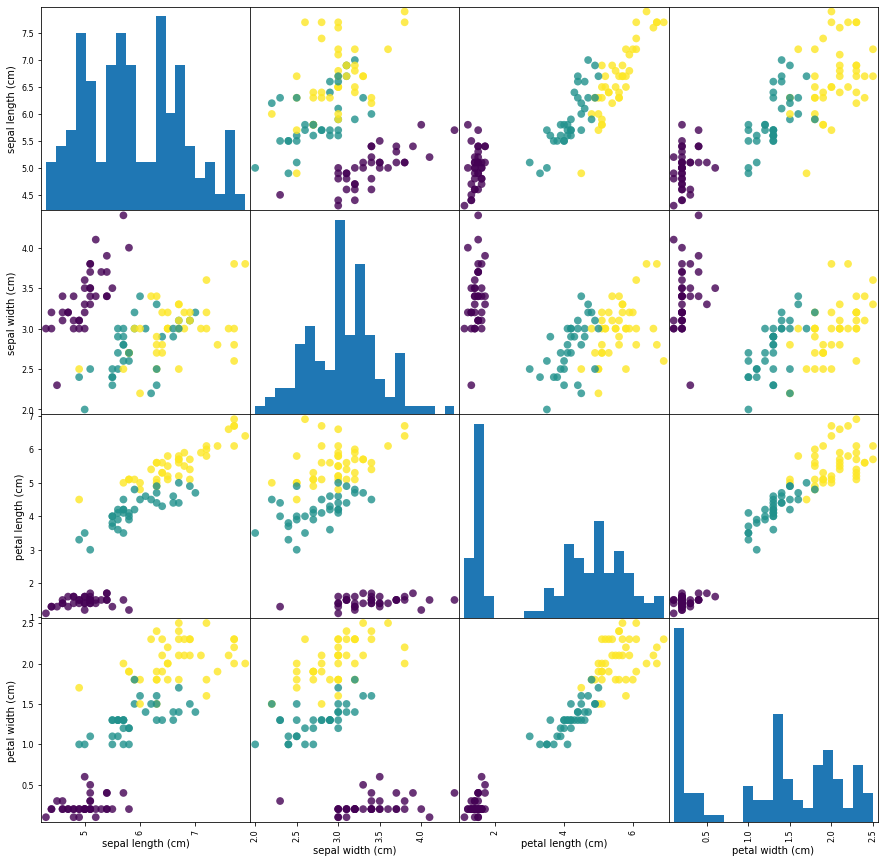

In [81]:
# On vérifie la cohérence du dataset, pour voir 
# si il n'y a pas une ligne ou les infos seraient erronées ou sans logique pour une série donnée

import pandas as pd
from pandas.plotting import scatter_matrix
# import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',hist_kwds={'bins': 20}, s=60, alpha=.8)


In [82]:
# On peut choisir entre plusieurs algorithmes classifieurs 
# pour réaliser la prédiction d'espèce de fleur en fonction des paramètres ' features)
# Là, on choisit Kmeans , ou le K- moyenne
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

# On  place les data qui ont été entraines dans X et les labels dans Y
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [86]:
# On tente de rélaiser une prédiction d'espèce de fleur 
# en donnant les caractéristiques d'une fleur inconnue (features)
# Il nous dit que c'est probablement une fleur d'espèce setosa en se basant sur le modèle entrainé qui récapitule toutes les features de toutes notrre expérience des fleurs

import numpy as np
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Predicted target name: {}".format(iris_dataset['target_names'][prediction]))


X_new.shape: (1, 4)
Prediction: [0]
Predicted target name: ['setosa']
